<a href="https://colab.research.google.com/github/kaliautkarsh98/Reuters-News-Category-Classification/blob/master/reuters_news_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [31]:
(x_train,y_train),(x_test,y_test)=reuters.load_data(num_words=10000,test_split=0.2)

In [32]:
print(len(x_train))
print(len(x_test))

8982
2246


In [33]:
num_class=np.max(y_train)+1

In [34]:
num_class

46

In [35]:
tokenizer=Tokenizer(num_words=10000)
x_train=tokenizer.sequences_to_matrix(x_train,mode='binary')
x_test=tokenizer.sequences_to_matrix(x_test,mode='binary')

In [36]:
import keras.utils
from keras import utils as np_utils

In [37]:
y_train=tf.keras.utils.to_categorical(y_train,num_class)
y_test=tf.keras.utils.to_categorical(y_test,num_class)

In [38]:
y_train.shape

(8982, 46)

In [39]:
y_test.shape

(2246, 46)

In [41]:
model=Sequential([
  Dense(512,input_shape=(10000,)),
  Activation('relu'),
  Dropout(0.5),
  Dense(num_class),
  Activation('softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120512   
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                23598     
_________________________________________________________________
activation_1 (Activation)    (None, 46)                0         
Total params: 5,144,110
Trainable params: 5,144,110
Non-trainable params: 0
_________________________________________________________________


In [48]:
from tensorflow.keras.callbacks import EarlyStopping 
es=EarlyStopping(monitor='val_loss',patience=3,verbose=1,mode='min')
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
history=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.1,callbacks=[es])

Epoch 1/100
253/253 [==============================] - 9s 37ms/step - loss: 0.1934 - accuracy: 0.9563 - val_loss: 1.5637 - val_accuracy: 0.7976
Epoch 2/100
253/253 [==============================] - 9s 36ms/step - loss: 0.1910 - accuracy: 0.9560 - val_loss: 1.6252 - val_accuracy: 0.7942
Epoch 3/100
253/253 [==============================] - 9s 36ms/step - loss: 0.1766 - accuracy: 0.9602 - val_loss: 1.7450 - val_accuracy: 0.7887
Epoch 4/100
253/253 [==============================] - 9s 36ms/step - loss: 0.1906 - accuracy: 0.9569 - val_loss: 1.6296 - val_accuracy: 0.7964
Epoch 00004: early stopping


In [50]:
model.evaluate(x_test,y_test,batch_size=32,verbose=1)

71/71 [==============================] - 1s 12ms/step - loss: 1.4949 - accuracy: 0.7992


[1.4949105978012085, 0.799198567867279]

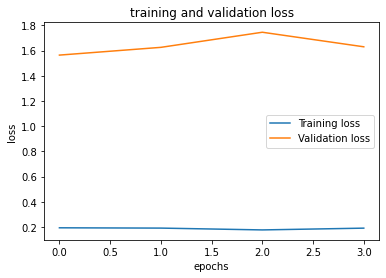

In [53]:
plt.plot(history.history['loss'],label="Training loss")
plt.plot(history.history['val_loss'],label="Validation loss")
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

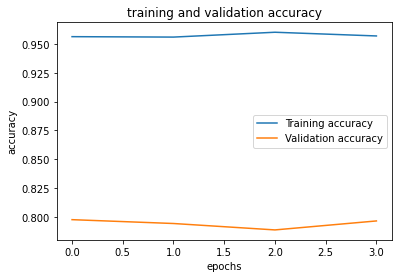

In [54]:
plt.plot(history.history['accuracy'],label="Training accuracy")
plt.plot(history.history['val_accuracy'],label="Validation accuracy")
plt.title('training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()